In [1]:
from weather_predictor import preprocess_data_for_n_days_ahead, create_and_train_model

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Using TensorFlow backend.


I downloaded a weather history from idojarasbudapest.hu using a python script. You can find the script in dataset_downloader.py.

In [2]:
df = pd.read_csv('data/weather_dataset.csv') # read downloaded dataset
n_data_to_show = 20 # we want to see the first 20 data
data = np.array(df) # convert it to numpy array, it's easier to hadle
data = data[:n_data_to_show, :4] # select the first 4 columns

### Visualizing
Plotting the first 20 data in the history dataset: min. and max temperature.

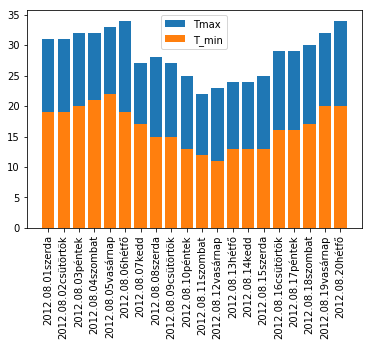

In [3]:
plt.xticks(rotation=90)
_ = plt.bar(np.arange(n_data_to_show), data[:, 1], tick_label=data[:, 0])
_ = plt.bar(np.arange(n_data_to_show), data[:, 2], tick_label=data[:, 0])
_ = plt.legend(['Tmax', 'T_min'])

Plotting the wind strength.

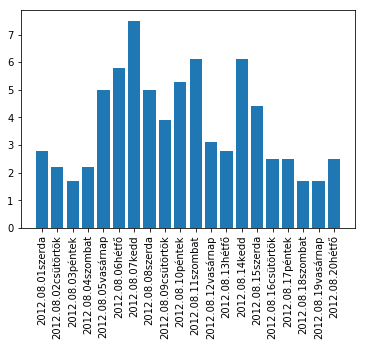

In [4]:
plt.xticks(rotation=90)
_ = plt.bar(np.arange(n_data_to_show), data[:, 3], tick_label=data[:, 0])

### Preprocessing the data
To train a model first we have to preprocess the data.
Prepocessing steps are:
    1. we select the appropriate columns: T_min, T_max, wind_speed
    2. we make inputs and outputs; if we want to make predictions for n days then:
        inputs: we select all the datas except the last n days
        outputs: we select all the datas except the first n days
    3. we shuffle the data
    4. we split the data into train-validation and test dataset, Keras can automatically make train-validation split for us
    5. we standard scale the input data: we fit the sklearn's StandardScaler to the training input and scale the train and the test input
    6. we minmax scale the output data: we fit the sklearn's MinMaxScaler to the training output and scale the train and test output
You can find the whole algorithm in the weather_predictor.py module in the preprocess_data_for_n_days_ahead function.

In [5]:
n_days = 1 # we want to train a model to predict for 1 day 
#(you can change it if you want to train a model to predict for more days)
(x_train, y_train), (x_valid, y_valid), (x_test, y_test), ssc, mmsc = preprocess_data_for_n_days_ahead(n_days, 0.8, 0.1) # preprocesing

### Creating and training the model
In the next step we create a model with [256, 128, 64, 31, 1] neurons. I'm using LeakyReLU activation in the hidden layers and linear activation in the last layer.
I'm using the ModelCheckPoint callback to save the model with the best validation result. I'm also using EarlyStopping callback so that if the loss doesn't change min 0.0001 for 10 epoch then the training terminates.
You can find this code in the weather_predictor.py module in the create_and_train_model function.

In [6]:
input_shape=x_train[0].shape[0] # shape of input data
model_name = 'model_{}_days'.format(n_days)
model = create_and_train_model(input_shape=input_shape, x_train=x_train, y_train=y_train, x_valid=x_valid, y_valid=y_valid,  model_name=model_name) # we create a model and train it

Train on 1983 samples, validate on 248 samples
Epoch 1/100


  16/1983 [..............................] - ETA: 48s - loss: 0.1945

 240/1983 [==>...........................] - ETA: 3s - loss: 0.0453 

 512/1983 [======>.......................] - ETA: 1s - loss: 0.0311

 800/1983 [===========>..................] - ETA: 0s - loss: 0.0273

1104/1983 [===============>..............] - ETA: 0s - loss: 0.0293

1408/1983 [====================>.........] - ETA: 0s - loss: 0.0275

1696/1983 [========================>.....] - ETA: 0s - loss: 0.0268

1983/1983 [==============================] - 1s 399us/step - loss: 0.0267 - val_loss: 0.0321


Epoch 2/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0148

 288/1983 [===>..........................] - ETA: 0s - loss: 0.0190

 576/1983 [=======>......................] - ETA: 0s - loss: 0.0164

 848/1983 [===========>..................] - ETA: 0s - loss: 0.0181

1104/1983 [===============>..............] - ETA: 0s - loss: 0.0182

1344/1983 [===================>..........] - ETA: 0s - loss: 0.0192

1584/1983 [======================>.......] - ETA: 0s - loss: 0.0209

1840/1983 [==========================>...] - ETA: 0s - loss: 0.0212

1983/1983 [==============================] - 0s 206us/step - loss: 0.0214 - val_loss: 0.0324


Epoch 3/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0263

 336/1983 [====>.........................] - ETA: 0s - loss: 0.0259

 672/1983 [=========>....................] - ETA: 0s - loss: 0.0224

1008/1983 [==============>...............] - ETA: 0s - loss: 0.0247

1344/1983 [===================>..........] - ETA: 0s - loss: 0.0235

1664/1983 [========================>.....] - ETA: 0s - loss: 0.0235

1983/1983 [==============================] - 0s 167us/step - loss: 0.0218 - val_loss: 0.0368


Epoch 4/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0115

 304/1983 [===>..........................] - ETA: 0s - loss: 0.0275

 592/1983 [=======>......................] - ETA: 0s - loss: 0.0258

 896/1983 [============>.................] - ETA: 0s - loss: 0.0239

1216/1983 [=================>............] - ETA: 0s - loss: 0.0219

1536/1983 [======================>.......] - ETA: 0s - loss: 0.0228

1856/1983 [===========================>..] - ETA: 0s - loss: 0.0214

1983/1983 [==============================] - 0s 176us/step - loss: 0.0218 - val_loss: 0.0339


Epoch 5/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0177

 336/1983 [====>.........................] - ETA: 0s - loss: 0.0263

 672/1983 [=========>....................] - ETA: 0s - loss: 0.0241

 976/1983 [=============>................] - ETA: 0s - loss: 0.0202

1280/1983 [==================>...........] - ETA: 0s - loss: 0.0199

1616/1983 [=======================>......] - ETA: 0s - loss: 0.0211

1888/1983 [===========================>..] - ETA: 0s - loss: 0.0205

1983/1983 [==============================] - 0s 173us/step - loss: 0.0214 - val_loss: 0.0326


Epoch 6/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0215

 336/1983 [====>.........................] - ETA: 0s - loss: 0.0175

 672/1983 [=========>....................] - ETA: 0s - loss: 0.0207

1008/1983 [==============>...............] - ETA: 0s - loss: 0.0198

1328/1983 [===================>..........] - ETA: 0s - loss: 0.0199

1648/1983 [=======================>......] - ETA: 0s - loss: 0.0219

1983/1983 [==============================] - 0s 164us/step - loss: 0.0217 - val_loss: 0.0316


Epoch 7/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0123

 352/1983 [====>.........................] - ETA: 0s - loss: 0.0165

 624/1983 [========>.....................] - ETA: 0s - loss: 0.0203

 928/1983 [=============>................] - ETA: 0s - loss: 0.0205

1264/1983 [==================>...........] - ETA: 0s - loss: 0.0213

1600/1983 [=======================>......] - ETA: 0s - loss: 0.0197

1920/1983 [============================>.] - ETA: 0s - loss: 0.0196

1983/1983 [==============================] - 0s 172us/step - loss: 0.0211 - val_loss: 0.0371


Epoch 8/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0117

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0189

 656/1983 [========>.....................] - ETA: 0s - loss: 0.0220

 992/1983 [==============>...............] - ETA: 0s - loss: 0.0237

1312/1983 [==================>...........] - ETA: 0s - loss: 0.0225

1648/1983 [=======================>......] - ETA: 0s - loss: 0.0224

1983/1983 [==============================] - 0s 165us/step - loss: 0.0216 - val_loss: 0.0315


Epoch 9/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0033

 352/1983 [====>.........................] - ETA: 0s - loss: 0.0253

 640/1983 [========>.....................] - ETA: 0s - loss: 0.0216

 960/1983 [=============>................] - ETA: 0s - loss: 0.0231

1248/1983 [=================>............] - ETA: 0s - loss: 0.0216

1536/1983 [======================>.......] - ETA: 0s - loss: 0.0195

1872/1983 [===========================>..] - ETA: 0s - loss: 0.0206

1983/1983 [==============================] - 0s 175us/step - loss: 0.0210 - val_loss: 0.0319


Epoch 10/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0075

 272/1983 [===>..........................] - ETA: 0s - loss: 0.0163

 544/1983 [=======>......................] - ETA: 0s - loss: 0.0195

 816/1983 [===========>..................] - ETA: 0s - loss: 0.0187

1040/1983 [==============>...............] - ETA: 0s - loss: 0.0201

1264/1983 [==================>...........] - ETA: 0s - loss: 0.0204

1600/1983 [=======================>......] - ETA: 0s - loss: 0.0212

1920/1983 [============================>.] - ETA: 0s - loss: 0.0215

1983/1983 [==============================] - 0s 205us/step - loss: 0.0211 - val_loss: 0.0314


Epoch 11/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0065

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0106

 640/1983 [========>.....................] - ETA: 0s - loss: 0.0139

 960/1983 [=============>................] - ETA: 0s - loss: 0.0138

1296/1983 [==================>...........] - ETA: 0s - loss: 0.0182

1616/1983 [=======================>......] - ETA: 0s - loss: 0.0204

1904/1983 [===========================>..] - ETA: 0s - loss: 0.0209

1983/1983 [==============================] - 0s 171us/step - loss: 0.0209 - val_loss: 0.0329


Epoch 12/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0072

 304/1983 [===>..........................] - ETA: 0s - loss: 0.0254

 624/1983 [========>.....................] - ETA: 0s - loss: 0.0205

 960/1983 [=============>................] - ETA: 0s - loss: 0.0217

1296/1983 [==================>...........] - ETA: 0s - loss: 0.0219

1616/1983 [=======================>......] - ETA: 0s - loss: 0.0214

1936/1983 [============================>.] - ETA: 0s - loss: 0.0206

1983/1983 [==============================] - 0s 170us/step - loss: 0.0208 - val_loss: 0.0336


Epoch 13/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0211

 288/1983 [===>..........................] - ETA: 0s - loss: 0.0249

 608/1983 [========>.....................] - ETA: 0s - loss: 0.0213

 896/1983 [============>.................] - ETA: 0s - loss: 0.0225

1232/1983 [=================>............] - ETA: 0s - loss: 0.0216

1568/1983 [======================>.......] - ETA: 0s - loss: 0.0226

1904/1983 [===========================>..] - ETA: 0s - loss: 0.0215

1983/1983 [==============================] - 0s 174us/step - loss: 0.0210 - val_loss: 0.0340


Epoch 14/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0046

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0246

 592/1983 [=======>......................] - ETA: 0s - loss: 0.0236

 864/1983 [============>.................] - ETA: 0s - loss: 0.0229

1184/1983 [================>.............] - ETA: 0s - loss: 0.0210

1504/1983 [=====================>........] - ETA: 0s - loss: 0.0212

1840/1983 [==========================>...] - ETA: 0s - loss: 0.0205

1983/1983 [==============================] - 0s 177us/step - loss: 0.0206 - val_loss: 0.0313


Epoch 15/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0103

 336/1983 [====>.........................] - ETA: 0s - loss: 0.0220

 656/1983 [========>.....................] - ETA: 0s - loss: 0.0182

 976/1983 [=============>................] - ETA: 0s - loss: 0.0199

1248/1983 [=================>............] - ETA: 0s - loss: 0.0183

1552/1983 [======================>.......] - ETA: 0s - loss: 0.0186

1888/1983 [===========================>..] - ETA: 0s - loss: 0.0208

1983/1983 [==============================] - 0s 172us/step - loss: 0.0205 - val_loss: 0.0316


Epoch 16/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0059

 336/1983 [====>.........................] - ETA: 0s - loss: 0.0200

 672/1983 [=========>....................] - ETA: 0s - loss: 0.0176

 976/1983 [=============>................] - ETA: 0s - loss: 0.0201

1296/1983 [==================>...........] - ETA: 0s - loss: 0.0199

1616/1983 [=======================>......] - ETA: 0s - loss: 0.0199

1904/1983 [===========================>..] - ETA: 0s - loss: 0.0201

1983/1983 [==============================] - 0s 177us/step - loss: 0.0207 - val_loss: 0.0311


Epoch 17/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0213

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0206

 656/1983 [========>.....................] - ETA: 0s - loss: 0.0213

 992/1983 [==============>...............] - ETA: 0s - loss: 0.0204

1312/1983 [==================>...........] - ETA: 0s - loss: 0.0203

1632/1983 [=======================>......] - ETA: 0s - loss: 0.0207

1952/1983 [============================>.] - ETA: 0s - loss: 0.0209

1983/1983 [==============================] - 0s 169us/step - loss: 0.0207 - val_loss: 0.0313


Epoch 18/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0113

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0222

 656/1983 [========>.....................] - ETA: 0s - loss: 0.0201

 976/1983 [=============>................] - ETA: 0s - loss: 0.0209

1296/1983 [==================>...........] - ETA: 0s - loss: 0.0200

1568/1983 [======================>.......] - ETA: 0s - loss: 0.0196

1904/1983 [===========================>..] - ETA: 0s - loss: 0.0198

1983/1983 [==============================] - 0s 173us/step - loss: 0.0204 - val_loss: 0.0324


Epoch 19/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0702

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0171

 640/1983 [========>.....................] - ETA: 0s - loss: 0.0211

 976/1983 [=============>................] - ETA: 0s - loss: 0.0225

1312/1983 [==================>...........] - ETA: 0s - loss: 0.0216

1632/1983 [=======================>......] - ETA: 0s - loss: 0.0207

1952/1983 [============================>.] - ETA: 0s - loss: 0.0208

1983/1983 [==============================] - 0s 168us/step - loss: 0.0215 - val_loss: 0.0312


Epoch 20/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0035

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0150

 624/1983 [========>.....................] - ETA: 0s - loss: 0.0204

 960/1983 [=============>................] - ETA: 0s - loss: 0.0185

1280/1983 [==================>...........] - ETA: 0s - loss: 0.0199

1600/1983 [=======================>......] - ETA: 0s - loss: 0.0202

1936/1983 [============================>.] - ETA: 0s - loss: 0.0205

1983/1983 [==============================] - 0s 170us/step - loss: 0.0205 - val_loss: 0.0325


Epoch 21/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0106

 336/1983 [====>.........................] - ETA: 0s - loss: 0.0294

 656/1983 [========>.....................] - ETA: 0s - loss: 0.0231

 992/1983 [==============>...............] - ETA: 0s - loss: 0.0220

1328/1983 [===================>..........] - ETA: 0s - loss: 0.0214

1616/1983 [=======================>......] - ETA: 0s - loss: 0.0213

1808/1983 [==========================>...] - ETA: 0s - loss: 0.0208

1936/1983 [============================>.] - ETA: 0s - loss: 0.0209

1983/1983 [==============================] - 0s 212us/step - loss: 0.0206 - val_loss: 0.0327


Epoch 22/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0457

 336/1983 [====>.........................] - ETA: 0s - loss: 0.0290

 640/1983 [========>.....................] - ETA: 0s - loss: 0.0317

 976/1983 [=============>................] - ETA: 0s - loss: 0.0269

1296/1983 [==================>...........] - ETA: 0s - loss: 0.0241

1568/1983 [======================>.......] - ETA: 0s - loss: 0.0218

1824/1983 [==========================>...] - ETA: 0s - loss: 0.0215

1983/1983 [==============================] - 0s 184us/step - loss: 0.0210 - val_loss: 0.0311


Epoch 23/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0093

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0271

 592/1983 [=======>......................] - ETA: 0s - loss: 0.0220

 832/1983 [===========>..................] - ETA: 0s - loss: 0.0197

1120/1983 [===============>..............] - ETA: 0s - loss: 0.0206

1440/1983 [====================>.........] - ETA: 0s - loss: 0.0202

1776/1983 [=========================>....] - ETA: 0s - loss: 0.0200

1983/1983 [==============================] - 0s 181us/step - loss: 0.0203 - val_loss: 0.0326


Epoch 24/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0071

 336/1983 [====>.........................] - ETA: 0s - loss: 0.0158

 672/1983 [=========>....................] - ETA: 0s - loss: 0.0168

1008/1983 [==============>...............] - ETA: 0s - loss: 0.0178

1296/1983 [==================>...........] - ETA: 0s - loss: 0.0196

1648/1983 [=======================>......] - ETA: 0s - loss: 0.0215

1983/1983 [==============================] - 0s 165us/step - loss: 0.0203 - val_loss: 0.0312


Epoch 25/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0076

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0208

 576/1983 [=======>......................] - ETA: 0s - loss: 0.0172

 912/1983 [============>.................] - ETA: 0s - loss: 0.0192

1232/1983 [=================>............] - ETA: 0s - loss: 0.0170

1584/1983 [======================>.......] - ETA: 0s - loss: 0.0193

1904/1983 [===========================>..] - ETA: 0s - loss: 0.0196

1983/1983 [==============================] - 0s 173us/step - loss: 0.0206 - val_loss: 0.0318


Epoch 26/100
  16/1983 [..............................] - ETA: 0s - loss: 0.0195

 320/1983 [===>..........................] - ETA: 0s - loss: 0.0156

 656/1983 [========>.....................] - ETA: 0s - loss: 0.0196

1008/1983 [==============>...............] - ETA: 0s - loss: 0.0177

1328/1983 [===================>..........] - ETA: 0s - loss: 0.0206

1664/1983 [========================>.....] - ETA: 0s - loss: 0.0200

1983/1983 [==============================] - 0s 165us/step - loss: 0.0207 - val_loss: 0.0325


### Making predictions and transforming back
Since we get the predictions using a model that learned minmax scaled data we have to transfrom back the results.

In [7]:
predictions = model.predict(x_test) # we make predictions
predictions = mmsc.inverse_transform(predictions.reshape(-1, 1)).reshape(-1) # transform back minmax scale
y_test = mmsc.inverse_transform(y_test.reshape(-1, 1)).reshape(-1) # transform back minmax scale

for pred, y in zip(predictions[:n_data_to_show], y_test[:n_data_to_show]): # print
    print('Predicted: {0:.2f}°C desired: {1:.2f}°C'.format(pred, y))


Predicted: -2.63°C desired: -10.00°C
Predicted: 13.39°C desired: 9.95°C
Predicted: 8.51°C desired: 10.70°C
Predicted: 6.76°C desired: 13.00°C
Predicted: 18.41°C desired: 19.50°C
Predicted: 1.76°C desired: 2.00°C
Predicted: 10.31°C desired: 8.50°C
Predicted: 19.45°C desired: 15.00°C
Predicted: 26.59°C desired: 29.50°C
Predicted: 6.57°C desired: 2.50°C
Predicted: 18.27°C desired: 18.75°C
Predicted: 16.71°C desired: 17.50°C
Predicted: 23.72°C desired: 23.50°C
Predicted: 18.24°C desired: 19.50°C
Predicted: 9.69°C desired: 11.50°C
Predicted: 24.98°C desired: 26.82°C
Predicted: 1.23°C desired: -0.15°C
Predicted: 1.97°C desired: 0.50°C
Predicted: 24.27°C desired: 26.00°C
Predicted: 19.92°C desired: 22.15°C


### Plotting results

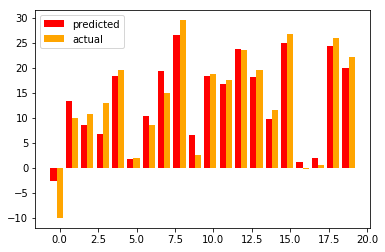

In [8]:
ax = plt.subplot(111)
w = 0.4
_ = ax.bar(np.arange(n_data_to_show)-w, predictions[:n_data_to_show],width=w,color='red',align='center')
_ = ax.bar(np.arange(n_data_to_show), y_test[:n_data_to_show],width=w,color='orange',align='center')
_ = ax.legend(['predicted', 'actual'])

Compared to the complexity of the network and the input data size this results are good. It would be better training a convolutional or recurrent network with the data as time series.